# FIFA 19 Player Dataset

## ABSTRACT

The aim of this assignment is to perform Linear and Logistic Regression for a chosen dataset and to build three models for the same. For building any model, the first needs to be Data Preprocessing which consists of some common steps like importing the libraries, dataset, cleaning the data of any missing values, performing some Exploratory Data Analysis(EDA) on the data to examine the estimators, etc. which is dealt with in the following steps. After data preprocessing is done, we can go ahead with building our models. In statistics, Linear Regression is a linear approach to model a relationship between a scalar response (dependent variable) and one or more explanatory variables (independent variables). If only one explanatory variable exists it is called Linear Regression. In case of multiple explanatory variables it is called Multiple Linear Regression. Linear Regression is performed on continuous values, therefore all the categorical variables need to be converted to numerical ones. This is dealt later in the assignment. In statistics, a logistic model uses a logistic function to model a binary dependent variable. It is a form of logistic regression.

## DATA

The original dataset for FIFA 19 can be found on https://www.kaggle.com/karangadiya/fifa19. This contains the complete players rating and other attributes given to them in FIFA 19.

ID: A unique number given to every person.

Name: Name of the player

Age: Age of the library

Nationality: Nationality of the Player

Overall: Player overall rating

Potential: Potential of a player to grow

Club: Club which the player plays for

Value: Players Transfer valure

Wage: Players weekly wage

Special: Special attributes of a player

Preferred Foot: Players preferred foot

International Reputation: Players reputation for the national team

Weak Foot: Players strength with the weak foot

Skill Moves: Number of skill moves a player can do

Work Rate: Work rate of a player in the games	

Body Type: Body type of a player

Real Face: Tells whether the player has a real face or no in FIFA 19	

Position: Position the player plays

Jersey Number: Jersey number of a player when playing for the club	

Contract Valid Until: Contract expiration year	

Height: Height of a player

Weight: Weight of a player

The below are the potential of a player for a particular skills in the game:

Crossing	Finishing	HeadingAccuracy	ShortPassing	Volleys	Dribbling	Curve	FKAccuracy	LongPassing	BallControl	Acceleration	SprintSpeed	Agility	Reactions	Balance	ShotPower	Jumping	Stamina	Strength	LongShots	Aggression	Interceptions	Positioning	Vision	Penalties	Composure	Marking	StandingTackle	SlidingTackle	GKDiving	GKHandling	GKKicking	GKPositioning	GKReflexes


In [640]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import re
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score # To perform cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge

In [641]:
#Reading the dataset
qw=pd.read_csv("fifa19_data.csv",encoding="ISO-8859-1")

###  Exploratory Data Analysis

In [642]:
#Getting the first 5 values in the table
qw.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,?110.5M,?565K,2202,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,?77M,?405K,2228,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,?118.5M,?290K,2143,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,Spain,91,93,Manchester United,?72M,?260K,1471,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,?102M,?355K,2281,...,79,88,68,58,51,15,13,5,10,13


In [643]:
#to calculate the total count, mean, standard deviation, min, low, median, high and maximum values of a particular column
qw.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,...,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000
mean,214225.713472,25.105257,66.236801,71.329334,1598.111731,1.113908,2.947260,2.362875,19.643041,49.748856,...,48.544480,58.655263,47.264092,47.684005,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367
std,30042.543245,4.675372,6.929243,6.144098,272.983157,0.395495,0.660106,0.756309,16.008322,18.354989,...,15.691563,11.420965,19.874746,21.647674,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,200235.250000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.00000
50%,221701.500000,25.000000,66.000000,71.000000,1636.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000
75%,236508.750000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.00000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.00000


In [644]:
#To obtain the totalrows, null or non null and type of the data in the column
qw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 56 columns):
ID                          17918 non-null int64
Name                        17918 non-null object
Age                         17918 non-null int64
Nationality                 17918 non-null object
Overall                     17918 non-null int64
Potential                   17918 non-null int64
Club                        17918 non-null object
Value                       17918 non-null object
Wage                        17918 non-null object
Special                     17918 non-null int64
Preferred Foot              17918 non-null object
International Reputation    17918 non-null int64
Weak Foot                   17918 non-null int64
Skill Moves                 17918 non-null int64
Work Rate                   17918 non-null object
Body Type                   17918 non-null object
Real Face                   17918 non-null object
Position                    17918 non-null object

In [645]:
#To check if there is any null value in the row.
qw.isnull().values.any()

False

In [646]:
#To obtain the sum of the null values in a particular column
qw.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpee

In [647]:
total = qw.isnull().sum()[qw.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(qw)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent


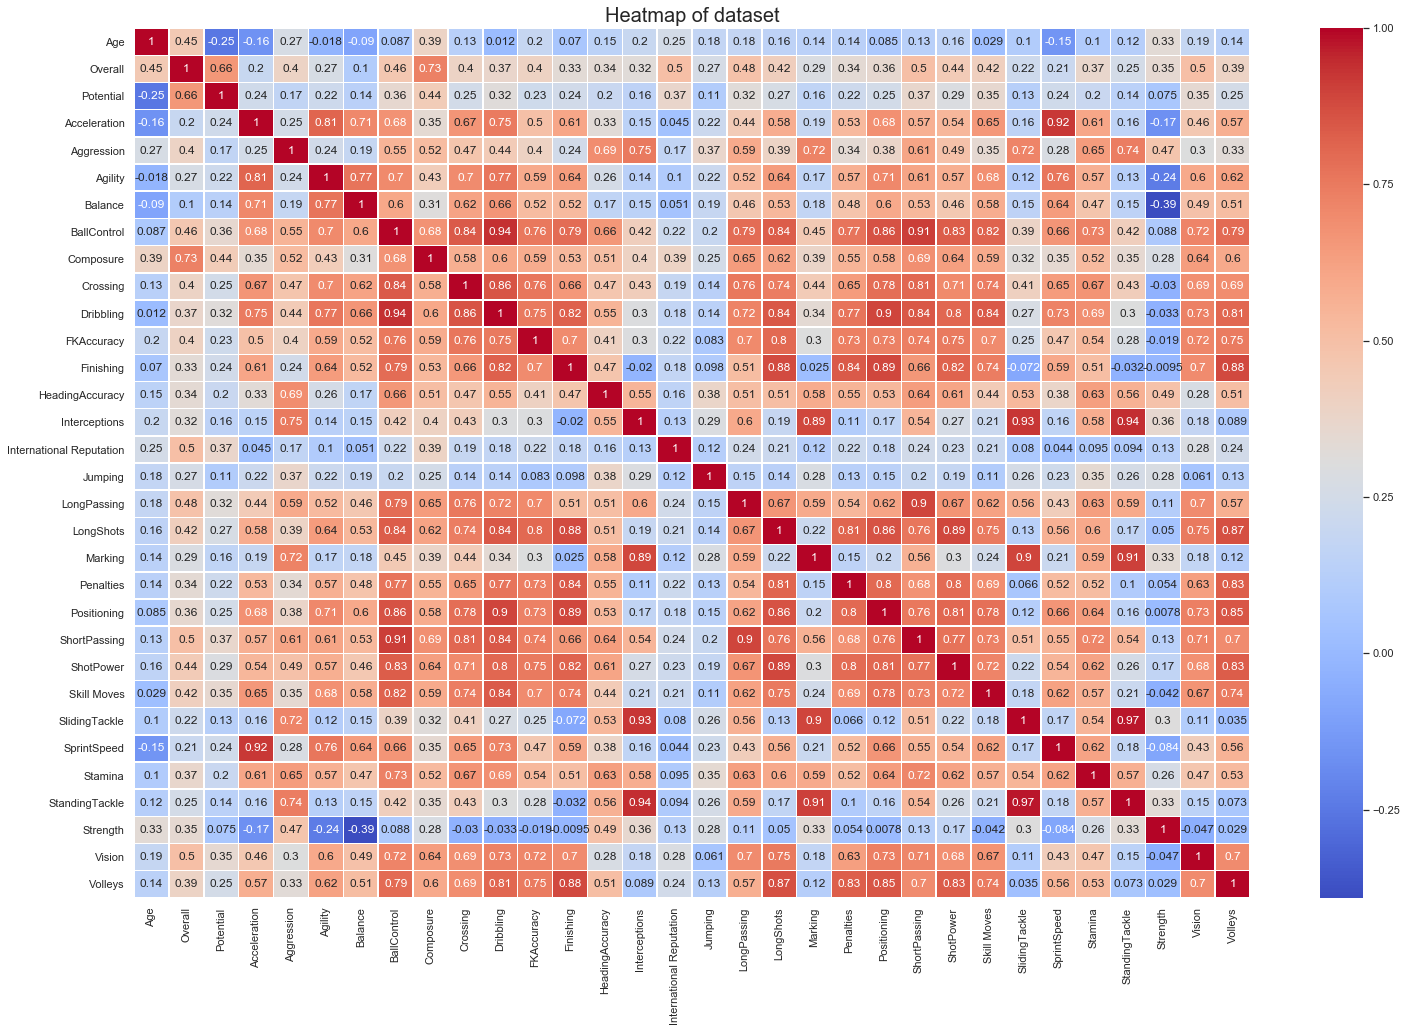

In [648]:
#Plotting the heatmap to know the correlation between different columns
plt.rcParams['figure.figsize']=(25,16)
heat=sns.heatmap(qw[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot = True, linewidths=.5, cmap='coolwarm')
heat.set_title(label='Heatmap of dataset', fontsize=20)
heat;

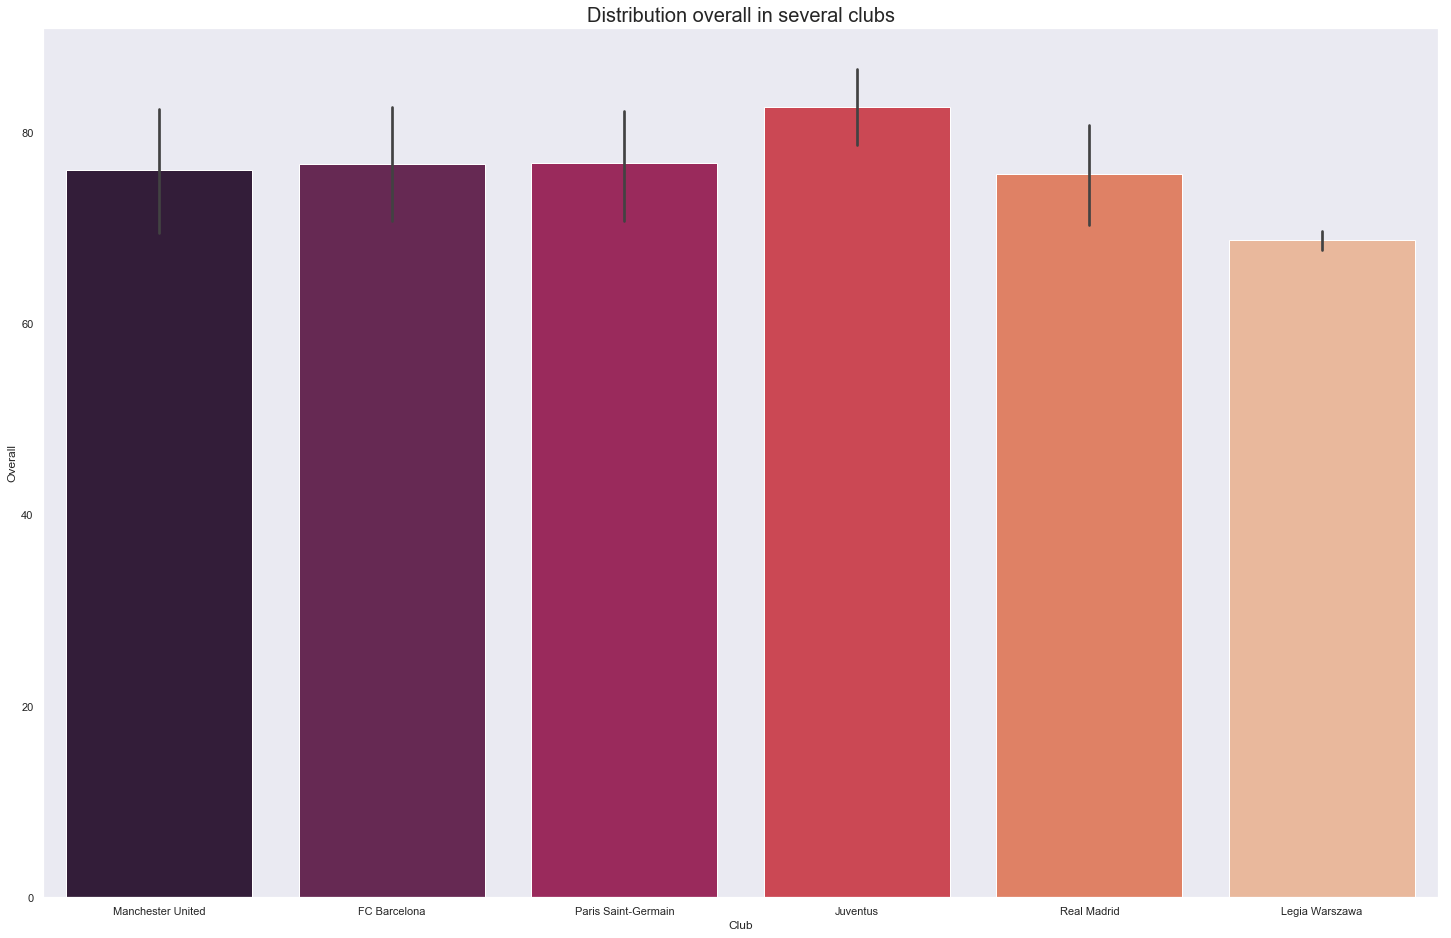

In [649]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
qw_club = qw.loc[qw['Club'].isin(some_clubs) & qw['Age'] & qw['Overall'] ]

ax = sns.barplot(x=qw_club['Club'], y=qw_club['Overall'], palette="rocket");
ax.set_title(label='Distribution overall in several clubs', fontsize=20);

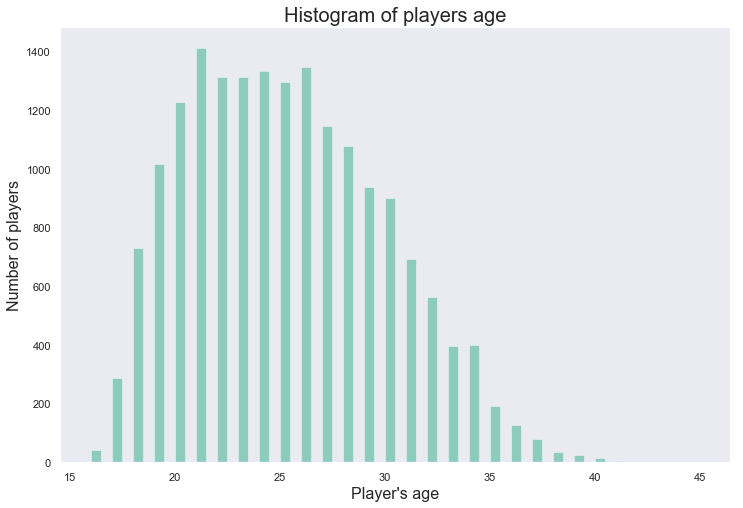

In [650]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = qw.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

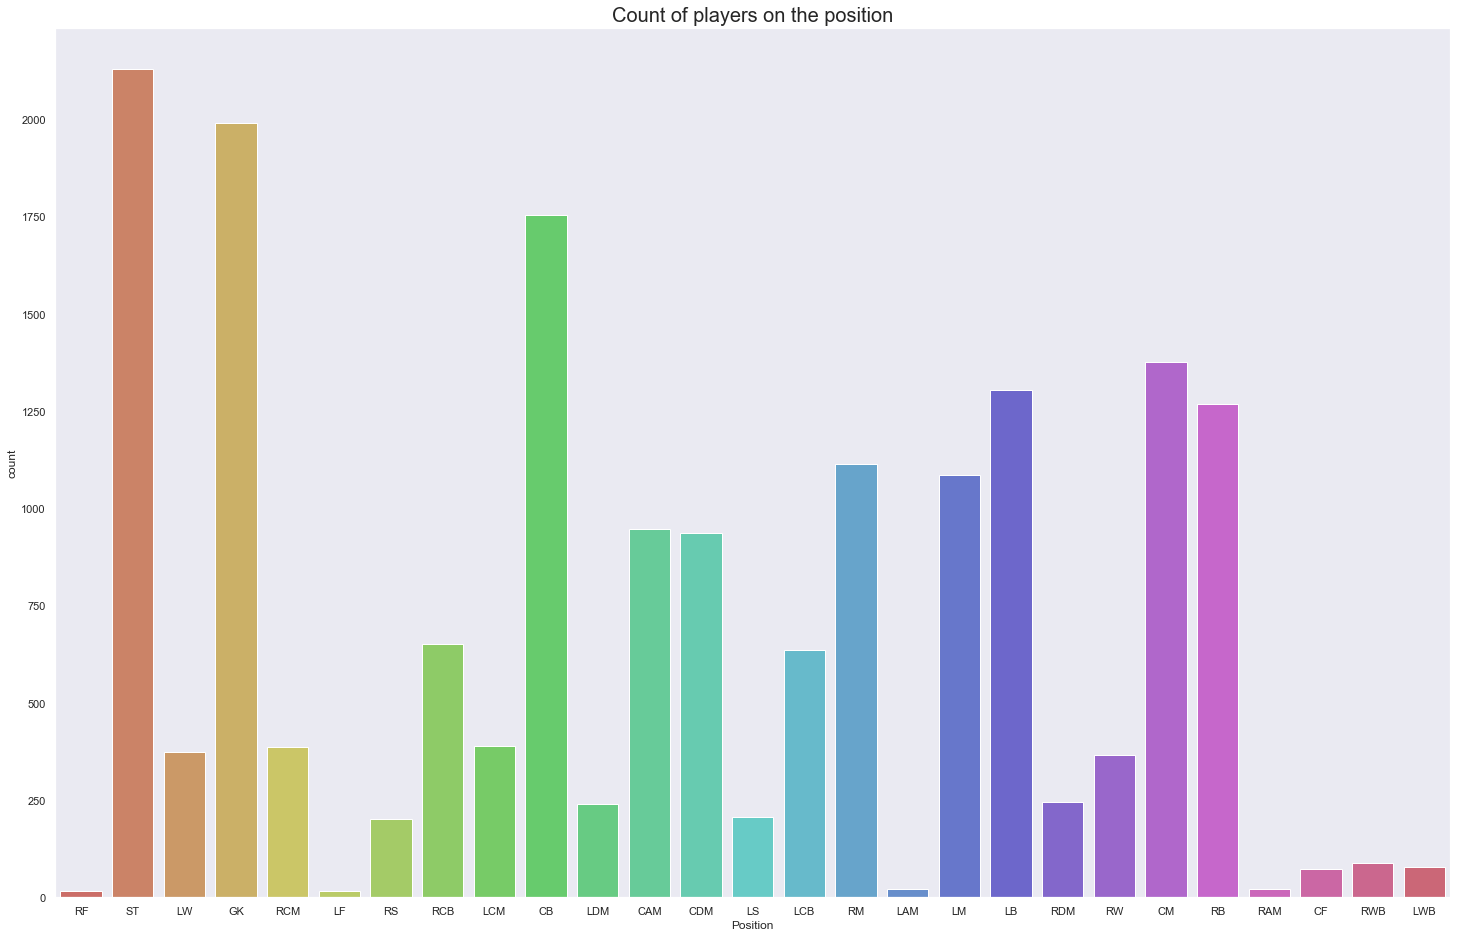

In [651]:
# count of all players for every position
ax = sns.countplot(x = 'Position', data = qw, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

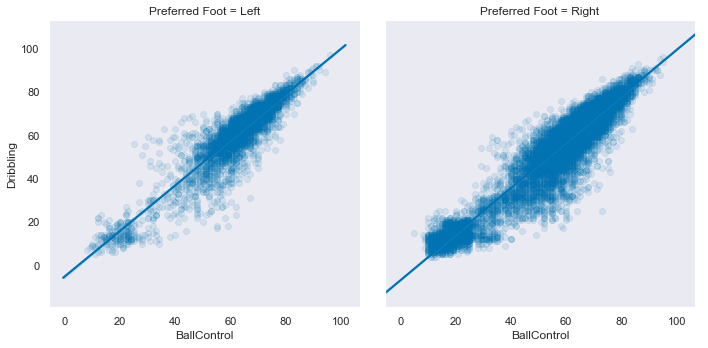

In [652]:
# Better is left-footed or right-footed player?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = qw,
          scatter_kws = {'alpha':0.1},
          col = 'Preferred Foot');

In [653]:
#Creating dummies for the preferred foot column to make it a binary column
qw=pd.get_dummies(qw,columns=['Preferred Foot'])

In [654]:
#To obtain the list of columns
qw.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot_Left',
       'Preferred Foot_Right'],
      dtype='object')

In [655]:
#TO get a correlation values with respect to the overall column as that is our target variable
corr_matrix=qw.corr()
corr_matrix['Overall']

ID                         -0.417698
Age                         0.453252
Overall                     1.000000
Potential                   0.660850
Special                     0.608863
International Reputation    0.501142
Weak Foot                   0.211741
Skill Moves                 0.415865
Jersey Number              -0.218778
Crossing                    0.396261
Finishing                   0.333887
HeadingAccuracy             0.342371
ShortPassing                0.504196
Volleys                     0.392264
Dribbling                   0.374267
Curve                       0.420675
FKAccuracy                  0.398184
LongPassing                 0.484981
BallControl                 0.462366
Acceleration                0.197856
SprintSpeed                 0.211919
Agility                     0.266363
Reactions                   0.851144
Balance                     0.103947
ShotPower                   0.443220
Jumping                     0.265609
Stamina                     0.367111
S

### Linear Regression

We use the boxplot to visualize the distribution of the Target Variable

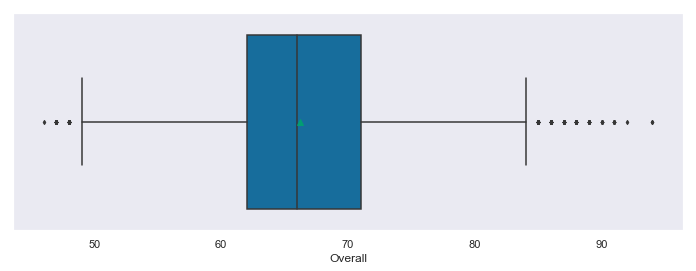

In [656]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'Overall', data = qw, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

We notice from the above graph that most of the data lie between 60-70 and very few players overall rating is above 85. 

#### MODEL 1

Now we will use the stepwise regression method to do the linear Regression model. 

In [657]:
#Sorting the different independent and dependent variable in X,Y respectively.
y=qw['Overall']
X=qw[['Skill Moves','Preferred Foot_Left','International Reputation','Composure','Reactions']]

In [658]:
#Splitting the data in Train set and test set. Thus fitting the train set into linear regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lm= LinearRegression()
lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [659]:
#Printing the intercept value in the linear regression
print(lm.intercept_)

25.29259409759728


In [660]:
#getting the co-effecient values of the different columns in linear regression.
lm.coef_

array([0.07824917, 0.18068188, 2.19142582, 0.1501254 , 0.4767066 ])

In [661]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [662]:
cdf

,coeff
Skill Moves,0.078249
Preferred Foot_Left,0.180682
International Reputation,2.191426
Composure,0.150125
Reactions,0.476707


In [663]:
predictions= lm.predict(X_test)
predictions

array([64.57168704, 63.06969103, 57.86358994, ..., 71.85245391,
       79.38437482, 69.48739429])

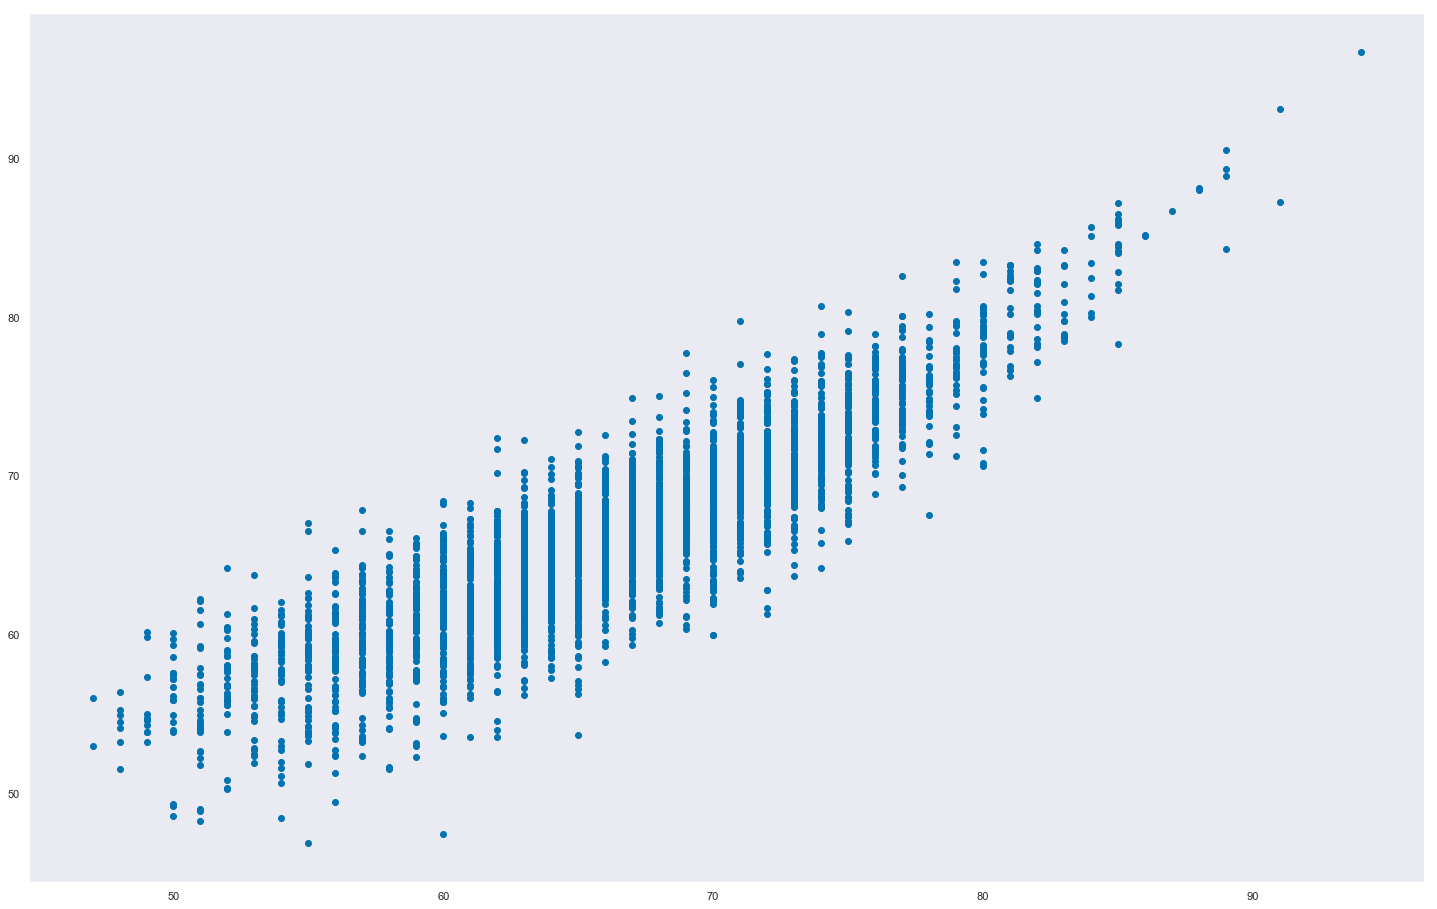

In [664]:
plt.scatter(y_test,predictions)

In [665]:
metrics.mean_squared_error(y_test,predictions)

10.618183873979401

In [666]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.2585554888599644

In [667]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:37:40   Log-Likelihood:                -46700.
No. Observations:               17918   AIC:                         9.341e+04
Df Residuals:                   17912   BIC:                         9.346e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The value of R-square and adjusted R-square is 0.550 and the p-value for all predictors are highly significant except for 'Skills Moves'. Hence we are removing this variable.

In [668]:
accuracy=cross_val_score(estimator=lm, X=X_test, y=y_test,cv=5)
accuracy.mean()*100

78.0926892024517

We have used Cross-Validation techniques to calculate the estimation of validation errors.
k-fold cross-validation technique divides the training set into k folds. One of the fold is considered as the validation set and remaining as the training sets. The model is then trained on the training set and then the validation error with one of the segments designated as the validation set. This process is repeated 'k' times. Finally, we compute the average of the k validation errors.
The accuracy of the above model is 78.28%

#### Model 2

In [669]:
y=qw['Overall']
X=qw[['Potential','Preferred Foot_Left','International Reputation','Composure','Reactions']]

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lm= LinearRegression()
lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [671]:
print(lm.intercept_)

10.692955646537392


In [672]:
lm.coef_

array([0.2936679 , 0.12231988, 1.41897412, 0.12760401, 0.41257164])

In [673]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
Potential,0.293668
Preferred Foot_Left,0.122320
International Reputation,1.418974
Composure,0.127604
Reactions,0.412572


In [674]:
predictions= lm.predict(X_test)
predictions

array([55.37194333, 73.54867755, 70.27048263, ..., 61.89392042,
       63.47623017, 63.58629894])

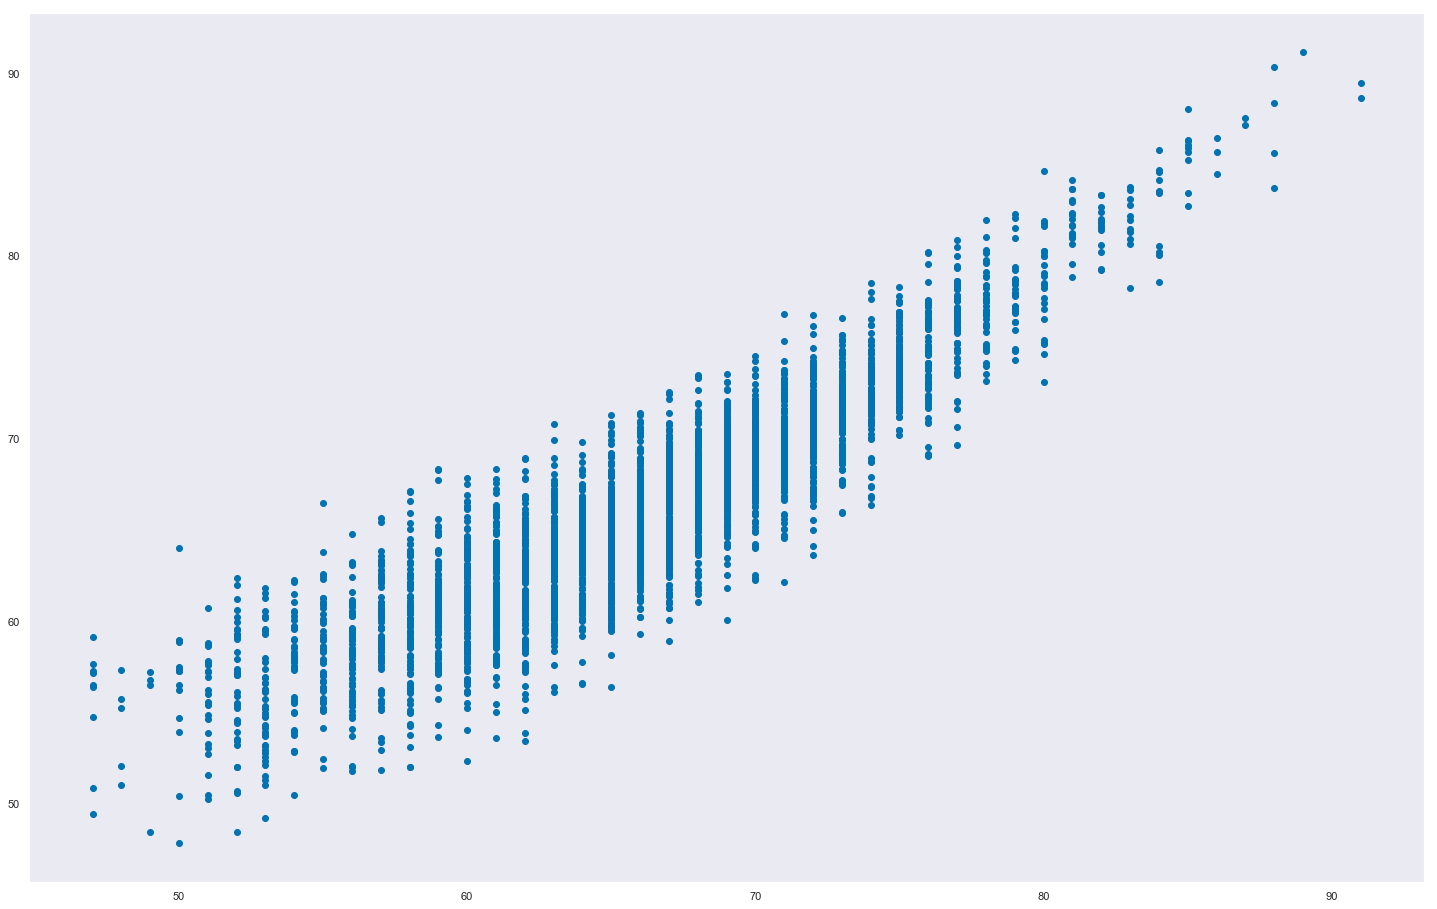

In [675]:
plt.scatter(y_test,predictions)

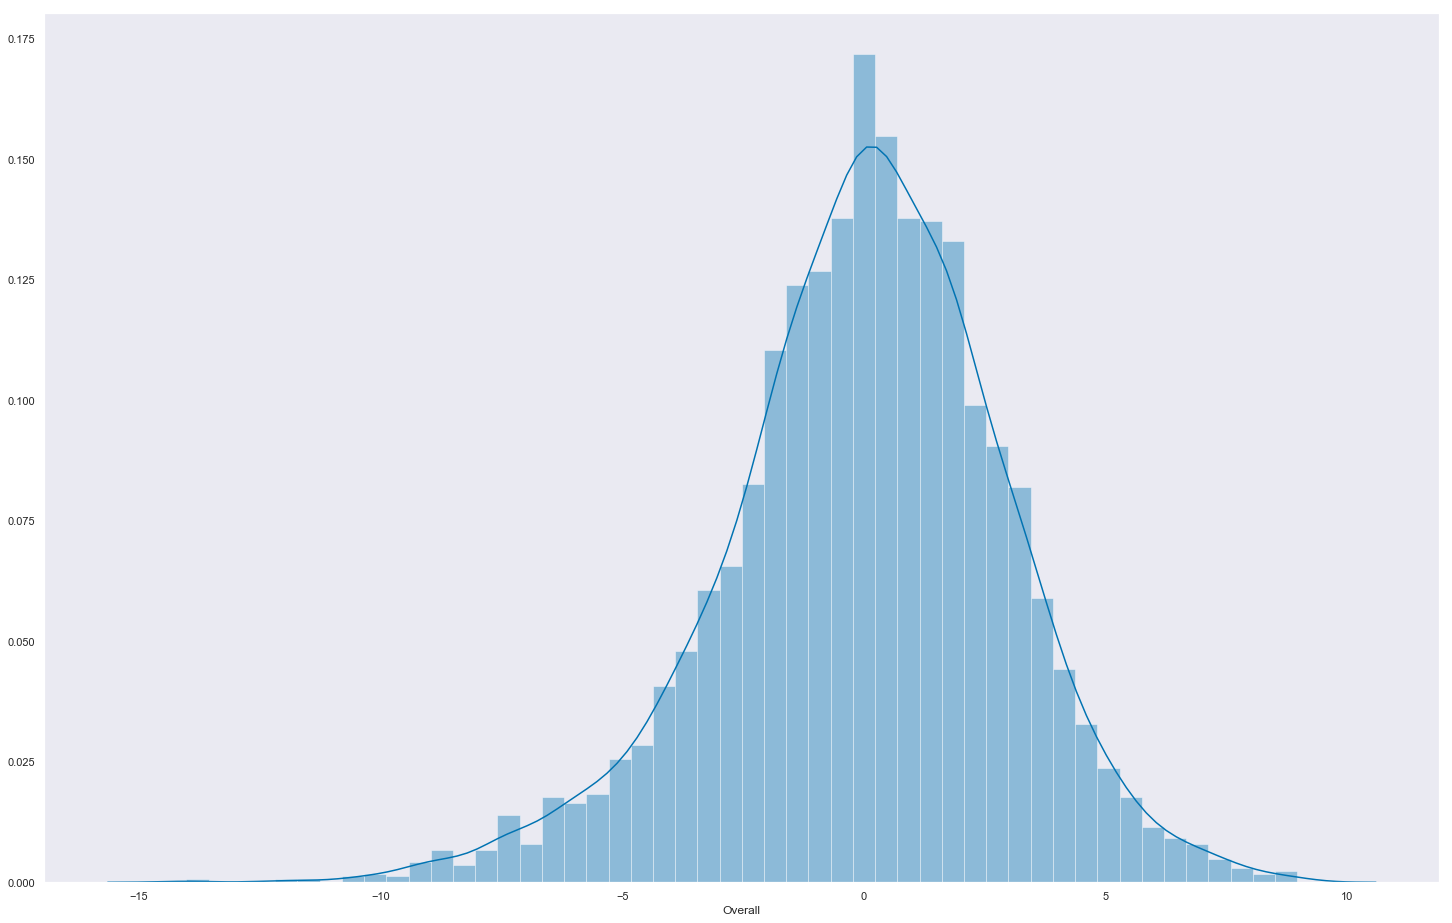

In [676]:
sns.distplot((y_test-predictions))

In [677]:
metrics.mean_absolute_error(y_test,predictions)

2.2331994398658472

In [678]:
metrics.mean_squared_error(y_test,predictions)

8.416798224351286

In [679]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.9011718708741276

In [680]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:37:42   Log-Likelihood:                -44535.
No. Observations:               17918   AIC:                         8.908e+04
Df Residuals:                   17912   BIC:                         8.913e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The value of R-square and adjusted R-square is 0.824 and the p-value for all predictors are highly significant.

In [681]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100)

81.93966754528665


The above accuracy is 82.30% which shows that our model is a good estimator of target variable Overall.
There is an increase of around 4% in the accuracy.

#### Model 3

In [682]:
#Here we take all the variable which describe the attribute of a player
y=qw['Overall']
X=qw[['Preferred Foot_Left','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle'
]]

In [683]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [684]:
print(lm.intercept_)

21.615873048948337


In [685]:
lm.coef_

array([ 0.24933513,  0.02758915,  0.0100156 , -0.02714248,  0.0497024 ,
       -0.00793535, -0.02713923,  0.01065283, -0.00583344,  0.00434604,
        0.06196634,  0.0201193 ,  0.02243477, -0.00106432,  0.47582299,
       -0.04974842,  0.01974775,  0.0332574 , -0.01043949,  0.06133022,
       -0.00499963, -0.01585946, -0.01061274, -0.0810013 ,  0.02675637,
       -0.01796366,  0.15978969,  0.00553123,  0.0015763 , -0.02497207])

In [686]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
Preferred Foot_Left,0.249335
Crossing,0.027589
Finishing,0.010016
HeadingAccuracy,-0.027142
ShortPassing,0.049702
Volleys,-0.007935
Dribbling,-0.027139
Curve,0.010653
FKAccuracy,-0.005833
LongPassing,0.004346


In [687]:
predictions= lm.predict(X_test)
predictions

array([66.27100309, 73.33291777, 60.49567084, ..., 61.19749158,
       51.00356386, 70.87608298])

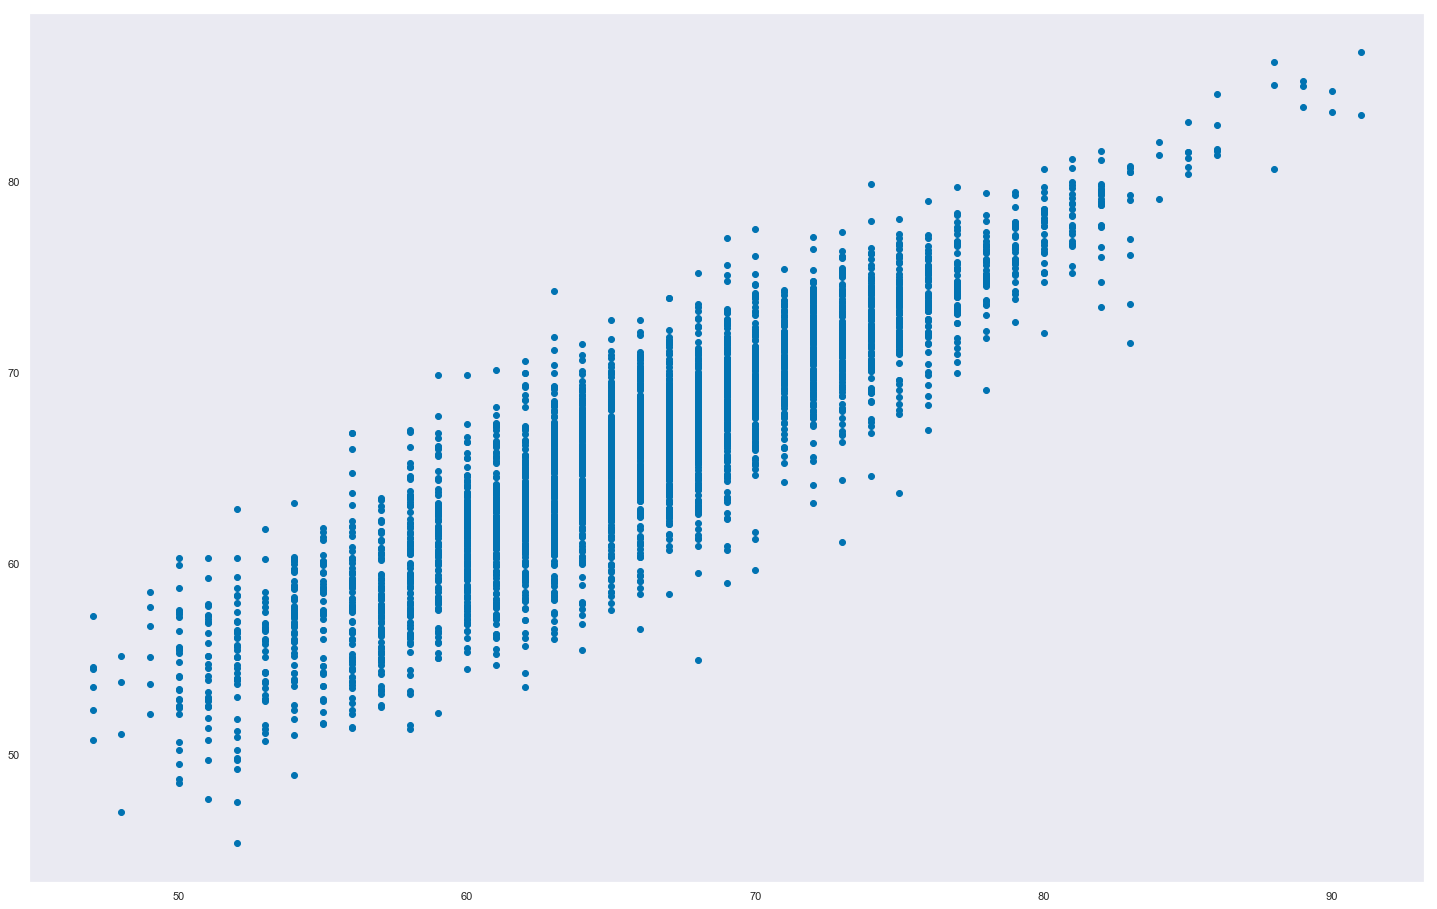

In [688]:
plt.scatter(y_test,predictions)

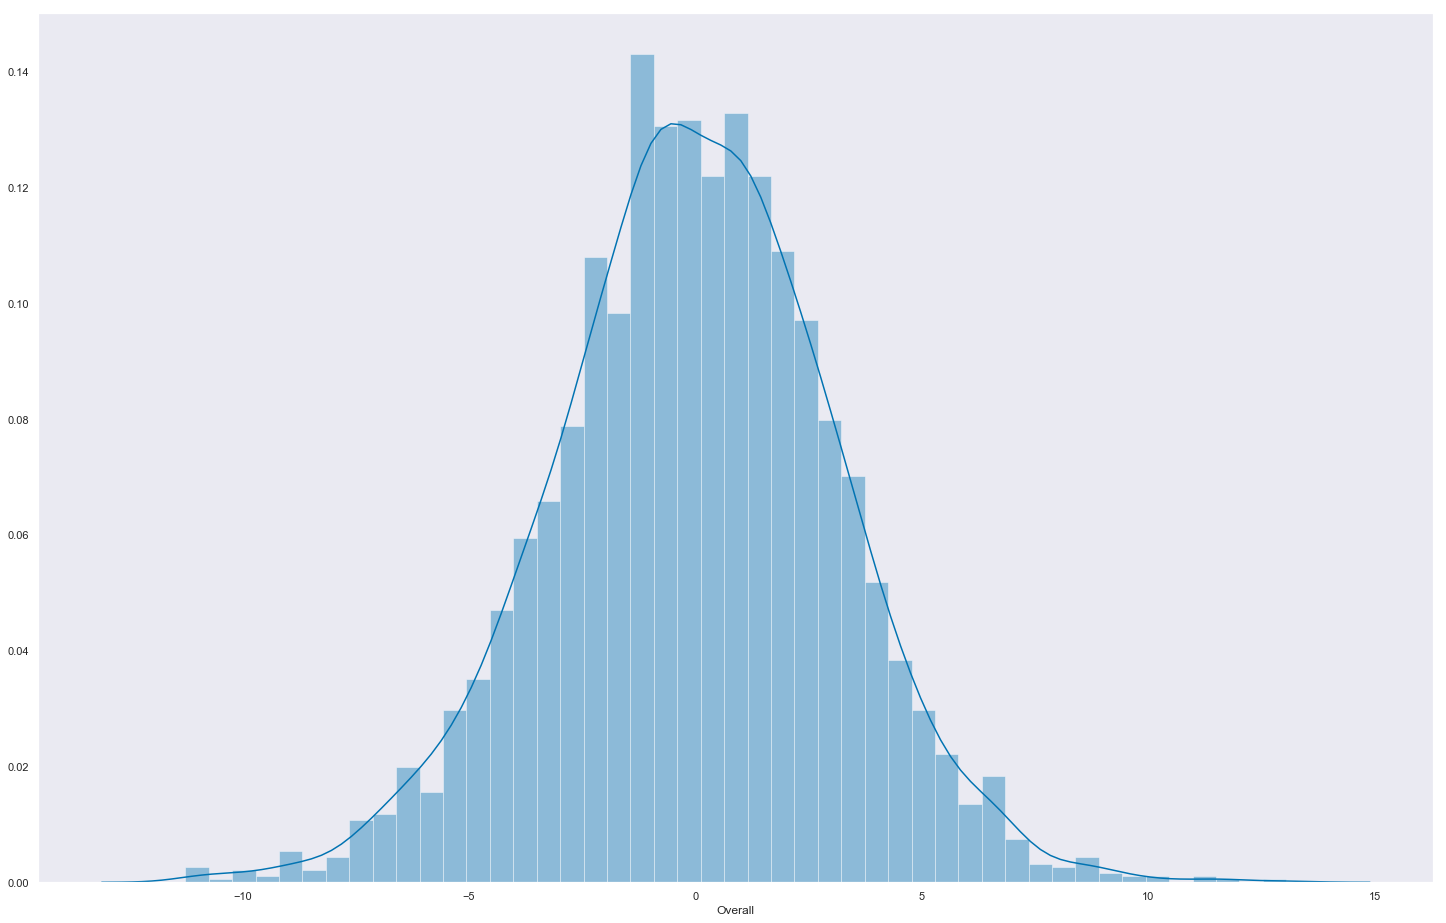

In [689]:
sns.distplot((y_test-predictions))

In [690]:
metrics.mean_absolute_error(y_test,predictions)

2.4333382305011595

In [691]:
metrics.mean_squared_error(y_test,predictions)

9.603812891670623

In [692]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.09900191862971

In [693]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     2339.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:37:43   Log-Likelihood:                -45830.
No. Observations:               17918   AIC:                         9.172e+04
Df Residuals:                   17887   BIC:                         9.196e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.7089    

The value of R-square and adjusted R-square is 0.797.

In [694]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100)

80.07975466971565


The above accuracy is 82.30% which shows that our model is a good estimator of target variable Overall when taken along with all the player attributes.

#### Q&A

* Is the relationship significant?   
    Looking at the P values of the different models the relationship is significant. 
* Are any model assumptions violated?      

 These are the following assumptions for linear model. 
    1. Linear relationship
    2. Multivariate normality
    3. No or little multicollinearity
    4. No auto-correlation
    5. Homoscedasticity


* Does the model make sense? Interpret the meaning of each independent variable.   
    Yes. I have created dummies for the Preferred Foot as I needed a binary variable.
* Cross-validate the model. How well did it do? 
    After cross validation the model accuracy has increased from 4-6%
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
    The models in rank in the order model 1, model 3, model 2

#### MultiColinearity

In [695]:
X=qw[['Preferred Foot_Left','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','Overall'
]]

vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,1.4,Preferred Foot_Left
1,51.3,Crossing
2,70.6,Finishing
3,48.9,HeadingAccuracy
4,212.8,ShortPassing
5,46.5,Volleys
6,151.5,Dribbling
7,54.0,Curve
8,35.2,FKAccuracy
9,93.8,LongPassing


#### Q&A

* Is there any multi-colinearity in the model?   

A: No

* In the multiple regression models are predictor variables independent of all the other predictor variables?   

A: No


### Logistic Regression

For Logistic regression, out target variable should be binary. Since we are building a model to predict whether the players with preferred foot left or right is better so we take Preferred Foot_Left as our target variable.

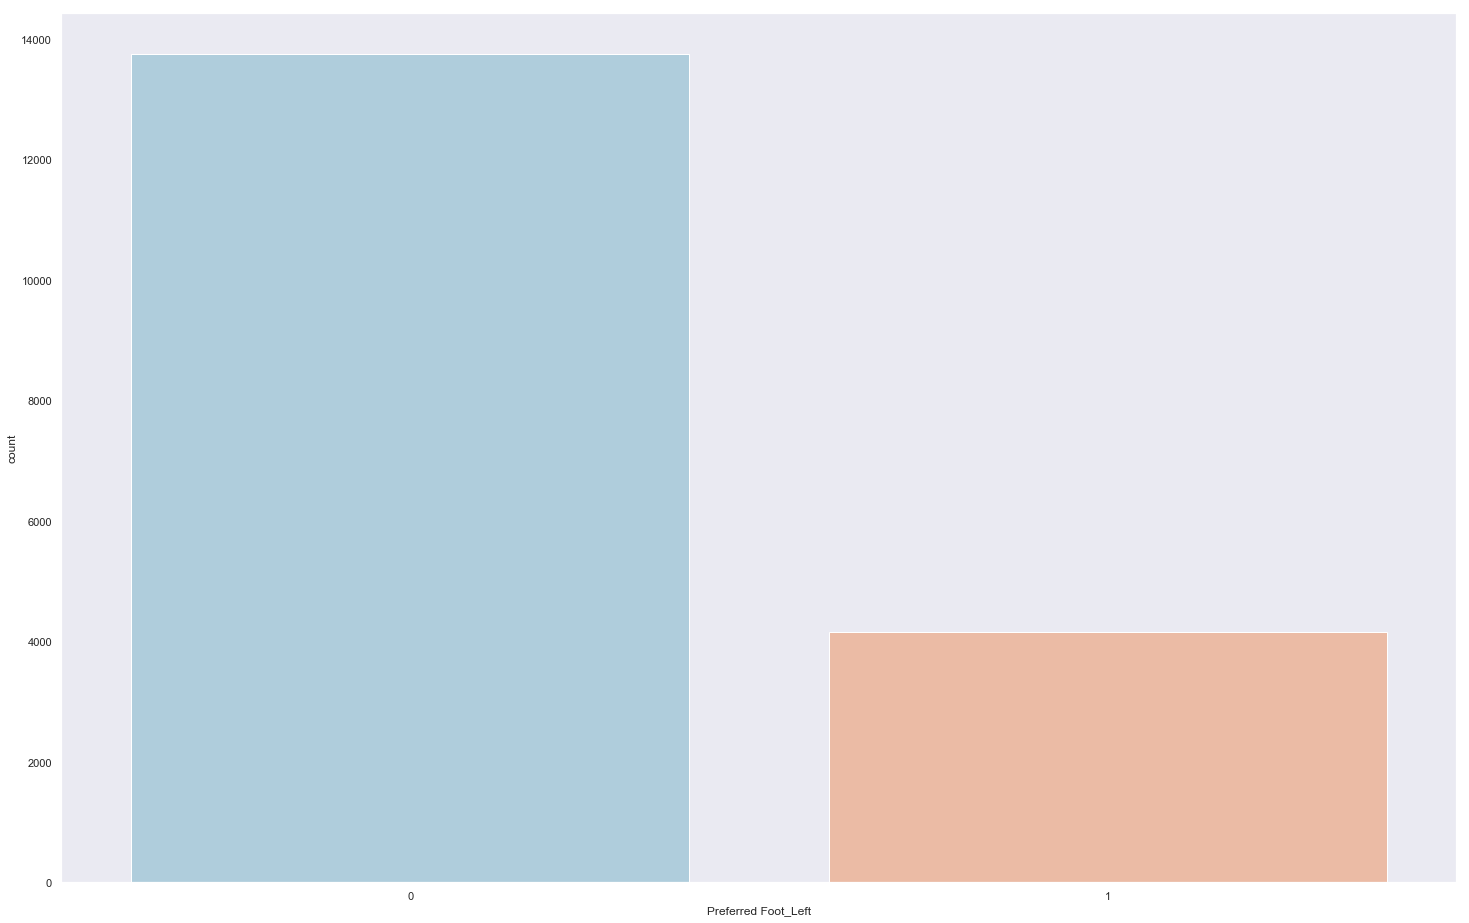

In [696]:
#To make sure that it's a binary variable, let's use Seaborn's countplot() function.
sns.countplot(x='Preferred Foot_Left',data=qw,palette='RdBu_r')

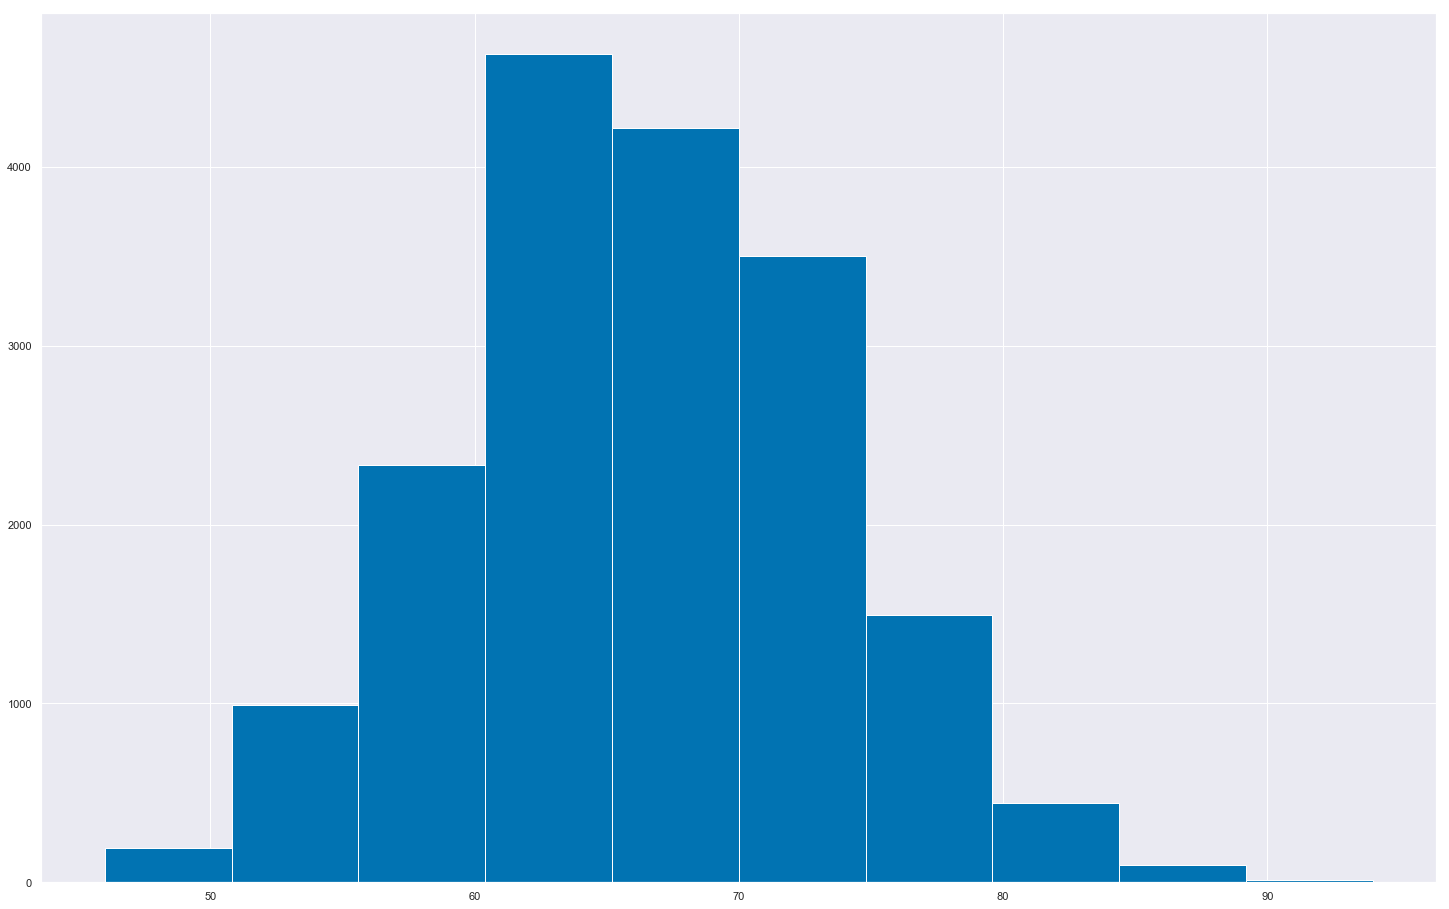

In [697]:
qw['Overall'].hist()

Model 1

In [698]:
P=qw[['Overall','International Reputation','Finishing','HeadingAccuracy','Dribbling' ]]

In [699]:
q=qw['Preferred Foot_Left']

In [700]:
P_train,P_test,q_train,q_test = train_test_split(P,q,test_size=0.3,random_state=25)

In [701]:
logmodel=LogisticRegression()
logmodel.fit(P_train, q_train)
logm=sm.Logit(q_train,P_train)
result=logm.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


In [702]:
predictions=logmodel.predict(P_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [703]:
print(classification_report(q_test,predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4155
           1       0.00      0.00      0.00      1221

   micro avg       0.77      0.77      0.77      5376
   macro avg       0.39      0.50      0.44      5376
weighted avg       0.60      0.77      0.67      5376



In [704]:
confusion_matrix(q_test,predictions)

array([[4153,    2],
       [1221,    0]], dtype=int64)

The confusion matrix results tell us that 4153 and 0 are the number of correct predictions, 2 and 1221 are the number of incorrect predictions.

In [705]:
print(result.summary())

                            Logit Regression Results                           
Dep. Variable:     Preferred Foot_Left   No. Observations:                12542
Model:                           Logit   Df Residuals:                    12537
Method:                            MLE   Df Model:                            4
Date:                 Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                         23:37:48   Log-Likelihood:                   -inf
converged:                        True   LL-Null:                        0.0000
                                         LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Overall                     -0.0347      0.002    -18.126      0.000      -0.038      -0.031
International Reputation     0.0151      0.066      0.228      0.820      -0.114 

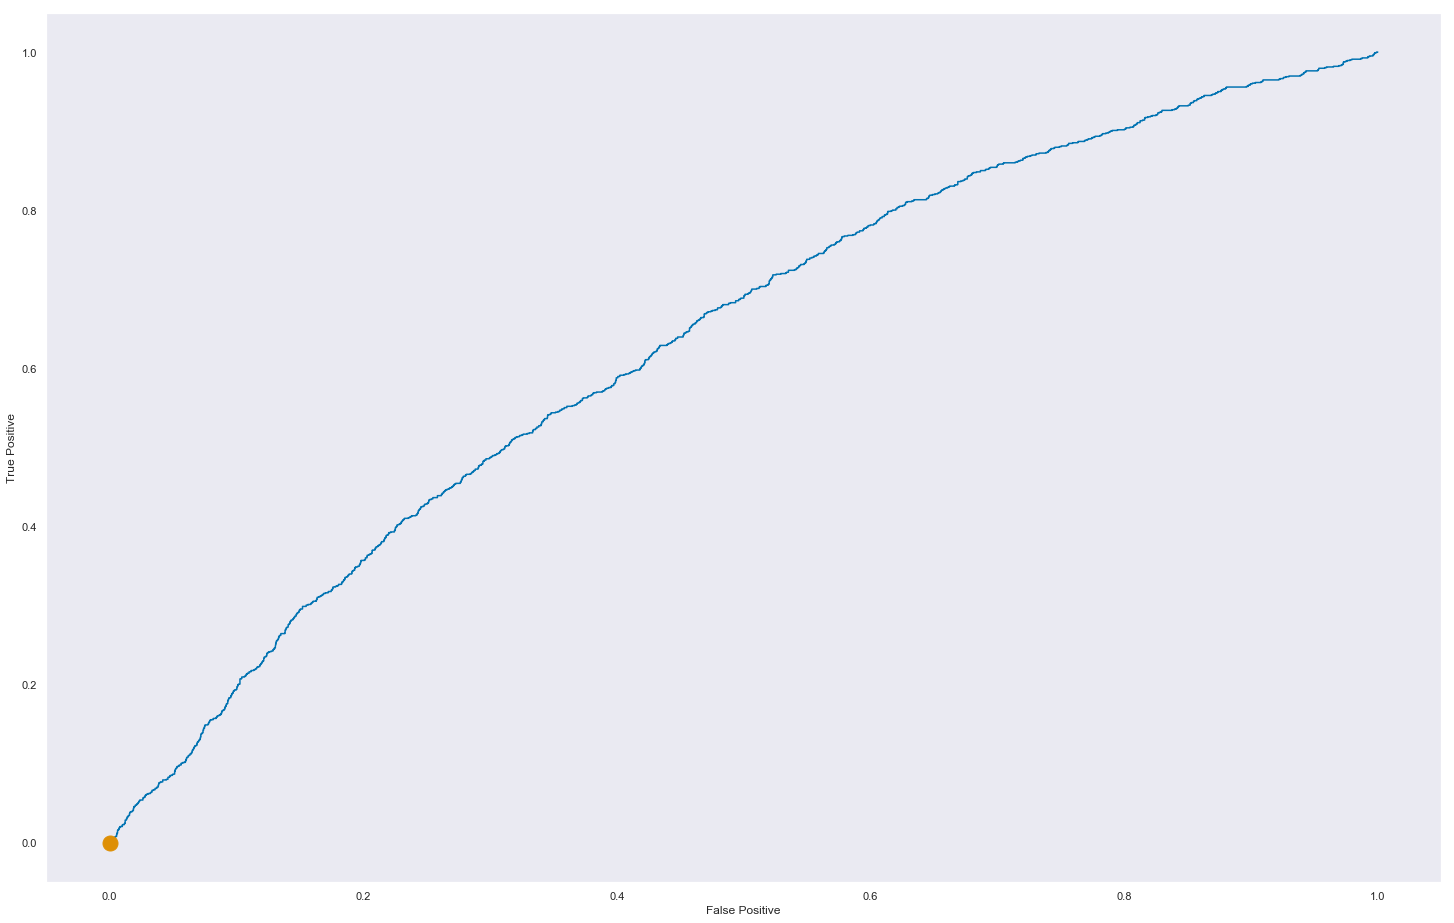

0.6331398677969075

In [706]:
# plotting a roc curve to get the auc
from sklearn.metrics import roc_curve
# to predict confidence scores for samples
falsepos,truepos,thresholds = roc_curve(q_test,logmodel.decision_function(P_test))  
plt.plot(falsepos,truepos,label="ROC Curve")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

cutoff = np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=15,label="cutoff",fillstyle="full")
plt.show()

auc_score = metrics.auc(falsepos, truepos)
auc_score

In [707]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, P_train, q_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (results.mean()))

10-fold cross validation average accuracy: 0.765508


Model 2

In [708]:
P=qw[['Overall','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle'
]]
q=qw['Preferred Foot_Left']

In [709]:
logreg = LogisticRegression()

In [710]:
rfe = RFE(logreg, n_features_to_select=29)
rfe = rfe.fit(P,q)

In [711]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [712]:
P=qw[['Overall','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle'
]]
q=qw['Preferred Foot_Left']

In [713]:
logm=sm.Logit(q,P)
logm.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


In [714]:
logm.fit().summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Preferred Foot_Left   No. Observations:                17918
Model:                           Logit   Df Residuals:                    17889
Method:                            MLE   Df Model:                           28
Date:                 Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                         23:37:53   Log-Likelihood:                   -inf
converged:                        True   LL-Null:                        0.0000
                                         LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Overall             0.0050      0.005      0.955      0.339      -0.005       0.015
Crossing            0.0436      0.003     16.751      0.000       0.038       0.049
Finishing          -0.0095      0.003     -3.128      0.002      -0.015      -0.004
HeadingAccuracy     0.0043      0.002      1.841      0.066      -0.000       0.009
ShortPassing       -0.0238      0.005     -5.076      0.000      -0.033      -0.015
Volleys            -0.0154      0.003     -5.869      0.000      -0.021      -0.010
Dribbling           0.0139      0.004      3.479      0.001       0.006       0.022
Curve               0.0187      0.003      7.117      0.000       0.014       0.024
FKAccuracy          0.0180      0.002      7.809      0.000       0.013       0.022
LongPassing        -0.0057      0.003     -1.674      0.094      -0.012       0.001
BallControl        -0.0009      0.005     -0.173      0.862      -0.011       0.009
Acceleration       -0.0041      0.004     -1.081      0.280      -0.012       0.003
SprintSpeed         0.0068      0.004      1.941      0.052   -6.57e-05       0.014
Agility            -0.0011      0.003     -0.375      0.708      -0.007       0.005
Reactions          -0.0095      0.004     -2.282      0.022      -0.018      -0.001
Balance            -0.0108      0.002     -4.701      0.000      -0.015      -0.006
Jumping            -0.0078      0.002     -4.130      0.000      -0.012      -0.004
Stamina            -0.0049      0.002     -2.206      0.027      -0.009      -0.001
Strength           -0.0062      0.002     -2.852      0.004      -0.010      -0.002
LongShots           0.0001      0.003      0.044      0.965      -0.005       0.005
Aggression         -0.0066      0.002     -3.149      0.002      -0.011      -0.002
Interceptions       0.0004      0.003      0.119      0.905      -0.005       0.006
Positioning        -0.0005      0.003     -0.177      0.860      -0.006       0.005
Vision             -0.0172      0.003     -6.052      0.000      -0.023      -0.012
Penalties          -0.0062      0.003     -2.480      0.013      -0.011      -0.001
Composure           0.0005      0.003      0.148      0.882      -0.006       0.007
Marking            -0.0013      0.002     -0.533      0.594      -0.006       0.003
StandingTackle     -0.0100      0.005     -2.218      0.027      -0.019      -0.001
SlidingTackle       0.0189      0.004      4.560      0.000       0.011       0.027
===================================================================================
"""

In [715]:
logm.fit().params

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


Overall            0.004952
Crossing           0.043566
Finishing         -0.009470
HeadingAccuracy    0.004299
ShortPassing      -0.023842
Volleys           -0.015428
Dribbling          0.013919
Curve              0.018721
FKAccuracy         0.017986
LongPassing       -0.005687
BallControl       -0.000857
Acceleration      -0.004110
SprintSpeed        0.006806
Agility           -0.001072
Reactions         -0.009463
Balance           -0.010830
Jumping           -0.007842
Stamina           -0.004898
Strength          -0.006199
LongShots          0.000115
Aggression        -0.006558
Interceptions      0.000352
Positioning       -0.000517
Vision            -0.017160
Penalties         -0.006217
Composure          0.000464
Marking           -0.001269
StandingTackle    -0.010001
SlidingTackle      0.018870
dtype: float64

In [716]:
logm.fit().conf_int()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


,0,1
Overall,-0.005207,0.015112
Crossing,0.038469,0.048664
Finishing,-0.015404,-0.003537
HeadingAccuracy,-0.000278,0.008877
ShortPassing,-0.033047,-0.014636
Volleys,-0.020580,-0.010276
Dribbling,0.006078,0.021760
Curve,0.013565,0.023877
FKAccuracy,0.013471,0.022500
LongPassing,-0.012343,0.000970


In [717]:
logmodel.score(P_test,q_test)

0.7725074404761905

In [718]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, P_train, q_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.766


The accuracy of the above model is 76.7%

Model 3

In [719]:
P=qw[['Overall','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','Acceleration','SprintSpeed','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','Aggression','Vision','Penalties','StandingTackle','SlidingTackle'
]]
q=qw['Preferred Foot_Left']

In [720]:
rfe = RFE(logreg, n_features_to_select=29)
rfe = rfe.fit(P,q)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [721]:
logm=sm.Logit(q,P)
logm.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


In [722]:
logm.fit().summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     Preferred Foot_Left   No. Observations:                17918
Model:                           Logit   Df Residuals:                    17895
Method:                            MLE   Df Model:                           22
Date:                 Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                         23:37:57   Log-Likelihood:                   -inf
converged:                        True   LL-Null:                        0.0000
                                         LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Overall             0.0051      0.005      1.056      0.291      -0.004       0.015
Crossing            0.0434      0.003     17.052      0.000       0.038       0.048
Finishing          -0.0095      0.003     -3.462      0.001      -0.015      -0.004
HeadingAccuracy     0.0042      0.002      1.854      0.064      -0.000       0.009
ShortPassing       -0.0243      0.004     -5.598      0.000      -0.033      -0.016
Volleys            -0.0154      0.003     -5.880      0.000      -0.020      -0.010
Dribbling           0.0133      0.003      3.978      0.000       0.007       0.020
Curve               0.0187      0.003      7.133      0.000       0.014       0.024
FKAccuracy          0.0180      0.002      7.949      0.000       0.014       0.022
LongPassing        -0.0056      0.003     -1.663      0.096      -0.012       0.001
Acceleration       -0.0044      0.004     -1.191      0.234      -0.012       0.003
SprintSpeed         0.0067      0.003      1.916      0.055      -0.000       0.014
Reactions          -0.0095      0.004     -2.367      0.018      -0.017      -0.002
Balance            -0.0112      0.002     -5.154      0.000      -0.015      -0.007
ShotPower          -0.0002      0.002     -0.063      0.949      -0.005       0.005
Jumping            -0.0079      0.002     -4.222      0.000      -0.012      -0.004
Stamina            -0.0051      0.002     -2.356      0.018      -0.009      -0.001
Strength           -0.0061      0.002     -2.810      0.005      -0.010      -0.002
Aggression         -0.0066      0.002     -3.176      0.001      -0.011      -0.003
Vision             -0.0172      0.003     -6.256      0.000      -0.023      -0.012
Penalties          -0.0062      0.003     -2.470      0.014      -0.011      -0.001
StandingTackle     -0.0104      0.004     -2.517      0.012      -0.018      -0.002
SlidingTackle       0.0188      0.004      4.596      0.000       0.011       0.027
===================================================================================
"""

In [723]:
logm.fit().params

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


Overall            0.005119
Crossing           0.043388
Finishing         -0.009520
HeadingAccuracy    0.004192
ShortPassing      -0.024302
Volleys           -0.015352
Dribbling          0.013295
Curve              0.018685
FKAccuracy         0.018041
LongPassing       -0.005582
Acceleration      -0.004425
SprintSpeed        0.006678
Reactions         -0.009468
Balance           -0.011166
ShotPower         -0.000157
Jumping           -0.007913
Stamina           -0.005107
Strength          -0.006102
Aggression        -0.006571
Vision            -0.017224
Penalties         -0.006197
StandingTackle    -0.010375
SlidingTackle      0.018752
dtype: float64

In [724]:
logm.fit().conf_int()

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


,0,1
Overall,-0.004381,0.014618
Crossing,0.038401,0.048375
Finishing,-0.014909,-0.004130
HeadingAccuracy,-0.000239,0.008622
ShortPassing,-0.032811,-0.015794
Volleys,-0.020469,-0.010235
Dribbling,0.006745,0.019845
Curve,0.013550,0.023819
FKAccuracy,0.013593,0.022490
LongPassing,-0.012159,0.000996


In [725]:
logmodel.score(P_test,q_test)

0.7725074404761905

In [726]:
accuracy=cross_val_score(estimator=logmodel, X=P, y=q,cv=5)
accuracy

array([0.7651325 , 0.77790179, 0.77644432, 0.77449065, 0.77393246])

#### Q&A

* Is the relationship significant?   

 A:   Yes, Looking at the P values it can be seen that the relationship is significant
    
* Are any model assumptions violated?      

 A:  First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires     the dependent variable to be ordinal.

    Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

    Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

    Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

    Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model.
    
    
* Does the model make sense?  Interpret the meaning of each independent variable.  

 A:   Prefered Foot is an independent variable which is a binary value and all the other variables to perform the logistic models
    
* Cross-validate the model. How well did it do? 

 A:There is not much of the differnece in the accuracy values of the different models
    
* Calculate the probability of getting the dependent variable

 A:0.77

### Regularization

In [727]:
y=qw['Overall']
X=qw[['Skill Moves','Preferred Foot_Left','International Reputation','Composure','Reactions']]

In [728]:

from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
# Fitting regression to training set
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [729]:
accuracy=cross_val_score(estimator=lm, X=X_test, y=y_test,cv=5)
accuracy.mean()*100

76.74940403967838

In [730]:
# Fitting regression to training set
rr = Ridge(alpha=0.50, normalize=True)
rr.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [731]:
accuracy=cross_val_score(estimator=lm, X=X_test, y=y_test,cv=5)
accuracy.mean()*100

76.74940403967838

### INTERACTION

In [732]:
qw['combo']=qw['Potential']*qw['International Reputation']
qw['combo1']=qw['Overall']*qw['Skill Moves']
qw.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot_Left,Preferred Foot_Right,combo,combo1
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,...,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000,17918.000000,17918.000000,17918.000000,17918.000000
mean,214225.713472,25.105257,66.236801,71.329334,1598.111731,1.113908,2.947260,2.362875,19.643041,49.748856,...,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367,0.232280,0.767720,80.363433,158.688581
std,30042.543245,4.675372,6.929243,6.144098,272.983157,0.395495,0.660106,0.756309,16.008322,18.354989,...,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613,0.422299,0.422299,34.998087,60.699519
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,48.000000,47.000000
25%,200235.250000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,24.000000,8.000000,8.000000,8.000000,8.000000,8.00000,0.000000,1.000000,67.000000,120.000000
50%,221701.500000,25.000000,66.000000,71.000000,1636.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000,0.000000,1.000000,71.000000,138.000000
75%,236508.750000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,64.000000,14.000000,14.000000,14.000000,14.000000,14.00000,0.000000,1.000000,76.000000,204.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,91.000000,90.000000,92.000000,91.000000,90.000000,94.00000,1.000000,1.000000,470.000000,470.000000


In [733]:
X=qw[['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','Acceleration','SprintSpeed','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','Aggression','Vision','Penalties','StandingTackle','SlidingTackle','combo','combo1'
]]

In [734]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [735]:
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [736]:
predictions= lm.predict(X_test)
predictions

array([75.44156756, 66.25237845, 63.2165464 , ..., 67.46701909,
       61.25200667, 61.09538796])

In [737]:
lm.score(X_test,y_test)

0.8186674113637669

In [738]:
accuracy = cross_val_score(estimator = lm, X= X_test, y = y_test, cv = 6)
accuracy.mean()

0.8176833821931359

Is there a significant synergy (interaction effect) in either of your tested product terms?

Yes. the Synergy betwenn product terms is good and accuracy is 81.77%

### CONCLUSION

After performing the Linear and Logistic Regressions on the FIFA 19 dataset, we can make the following conclusions

Linear Regression is performed only on numerical data. Categorical data must be LabelEncoded, this makes it continous.



### CONTRIBUTIONS

Personal Contributions: 45%,
External Contributions: 55%

### CITATIONS

* https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb
* https://newonlinecourses.science.psu.edu/stat501/node/347/
* https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb
* https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.
* http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
* https://stats.stackexchange.com/questions/354709/sklearn-metrics-accuracy-score-vs-logisticregression-score
* https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
* https://stats.stackexchange.com/questions/388651/multiple-regression-with-dummy-variables-and-interaction-term


### LICENSE

Copyright 2019 Rohit Sudhakar Shetty

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.